# Problem Statement 

Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Import the dataset 
train = pd.read_csv('train_jqd04QH.csv')
test = pd.read_csv('test_KaymcHn.csv')

In [4]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [6]:
# combine the dataset 
combined =pd.concat([train,test],ignore_index=False)
train.shape,test.shape,combined.shape

((18359, 14), (15021, 13), (33380, 14))

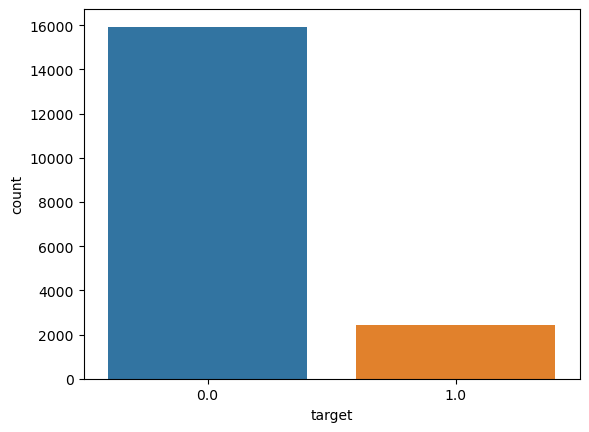

In [7]:
# target variable 
sns.countplot(x='target',data=combined)
plt.show()
# As per the data,very small percentage of population is look for a job 

In [8]:
combined.select_dtypes(exclude= np.number).columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [9]:
num_cols = ['city_development_index', 'training_hours']
cat_col = ['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job']

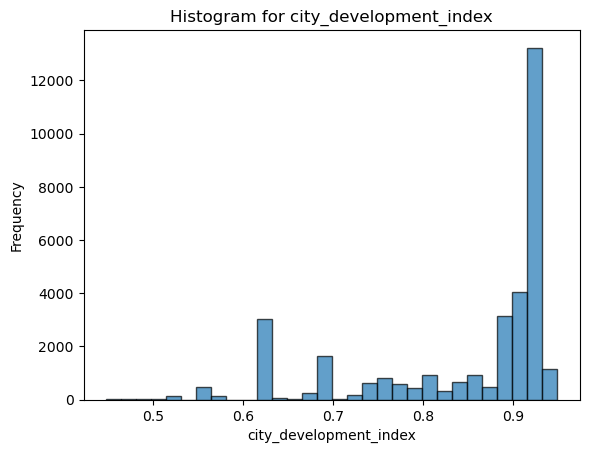

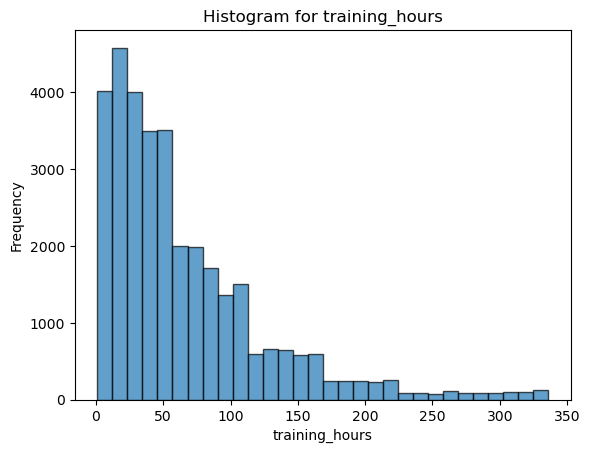

In [10]:
# univariate analysis 
for col in num_cols:
    plt.hist(combined[col], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {col}')
    plt.show()

In [11]:
combined.describe()

,enrollee_id,city_development_index,training_hours,target
count,33380.000000,33380.000000,33380.000000,18359.000000
mean,16690.500000,0.846934,65.565638,0.132088
std,9636.120329,0.109972,60.363572,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8345.750000,0.794000,23.000000,0.000000
50%,16690.500000,0.910000,47.000000,0.000000
75%,25035.250000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<Axes: xlabel='training_hours'>

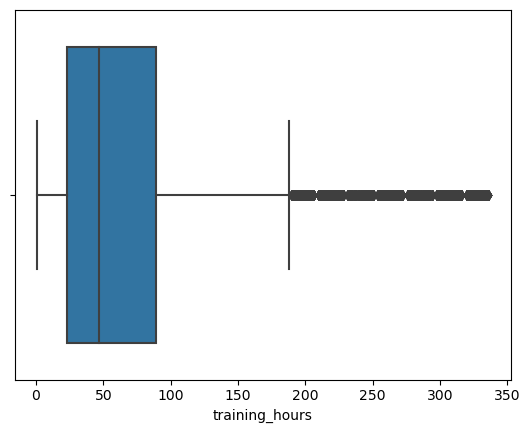

In [12]:
sns.boxplot(x="training_hours",data=combined)

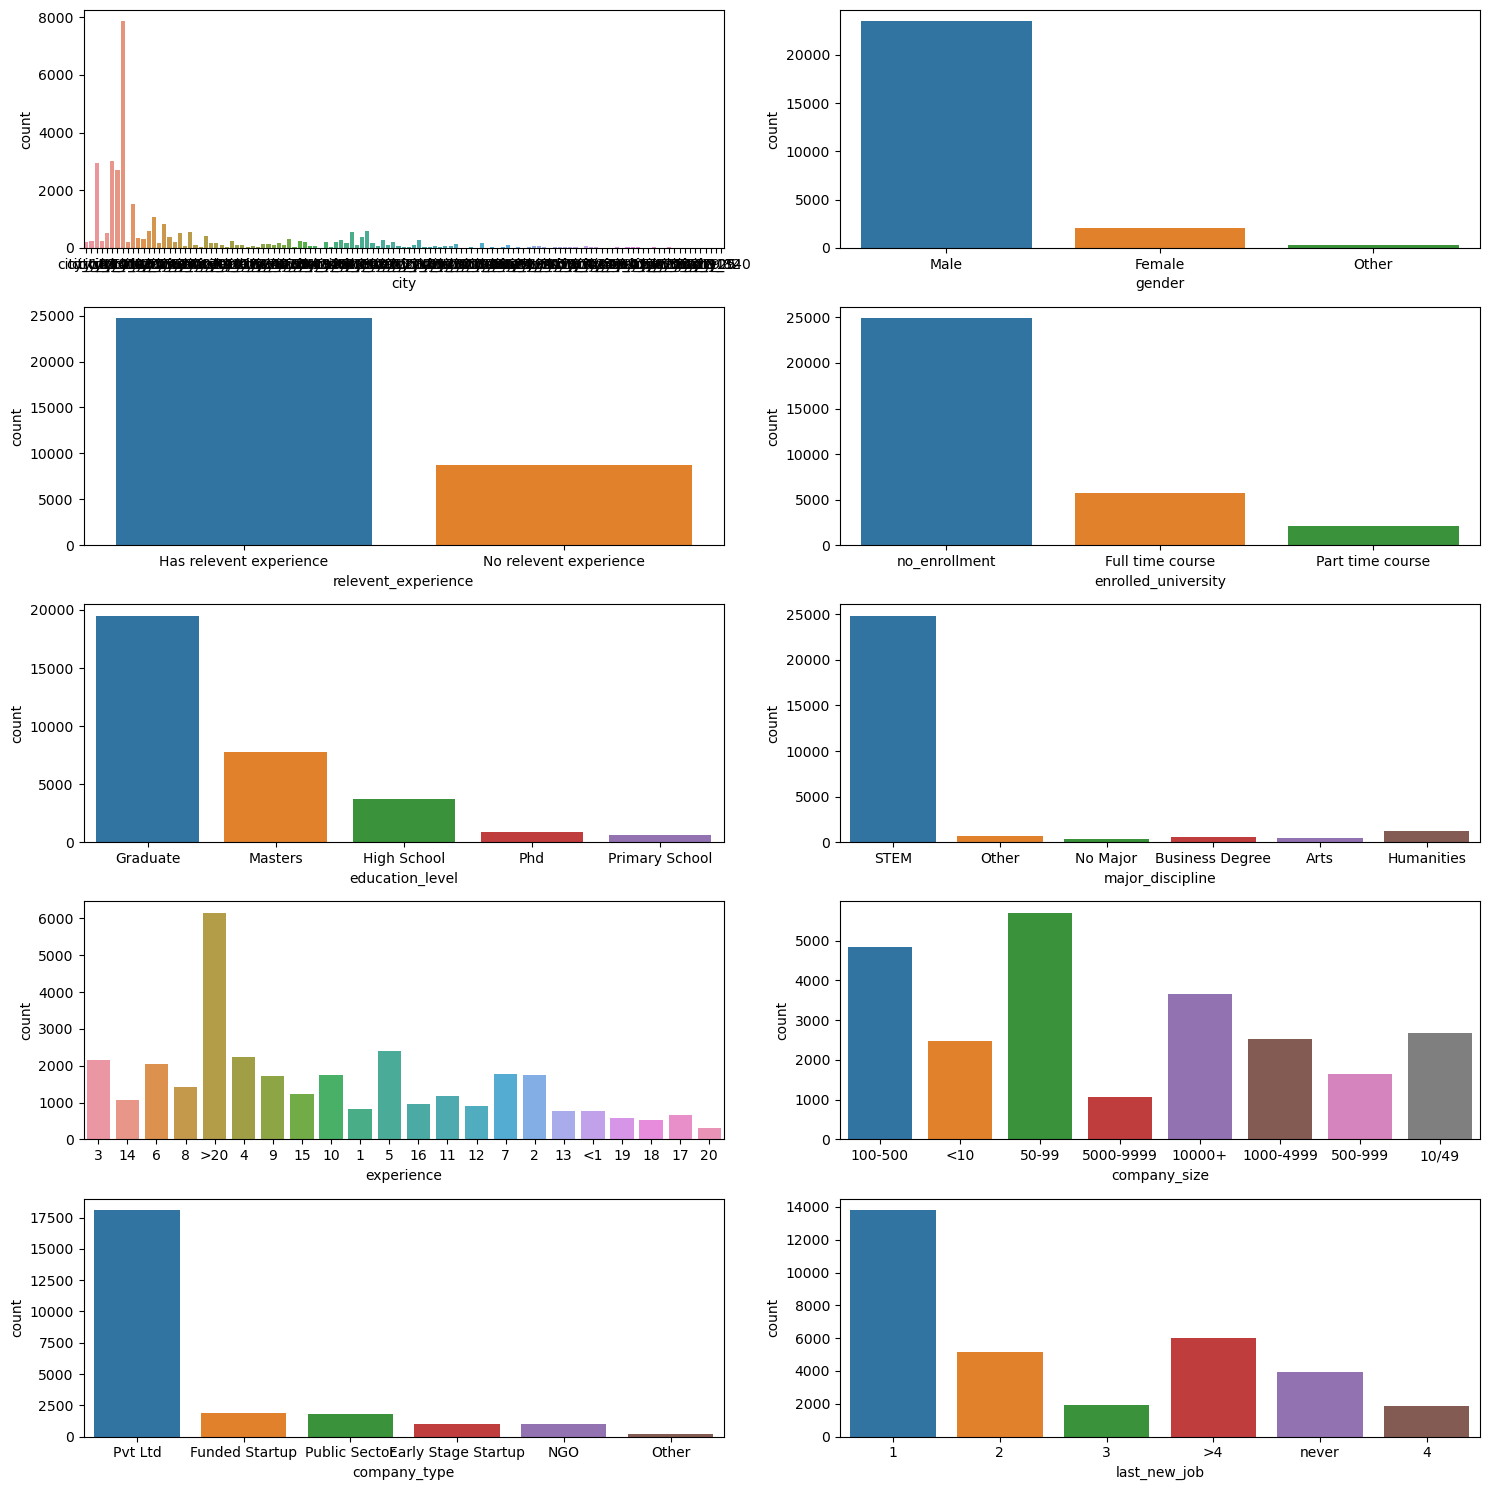

In [13]:
# Categorical Data 
nrows = 5
ncols=2
iterator =1

plt.figure(figsize=(15,15))

for i in cat_col:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(x=i,data=combined)
    iterator+=1

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

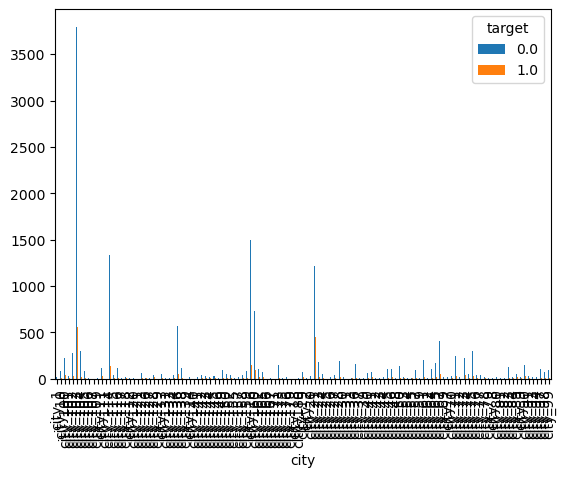

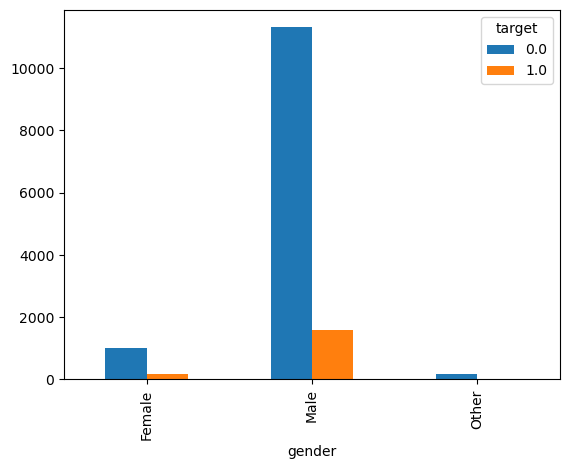

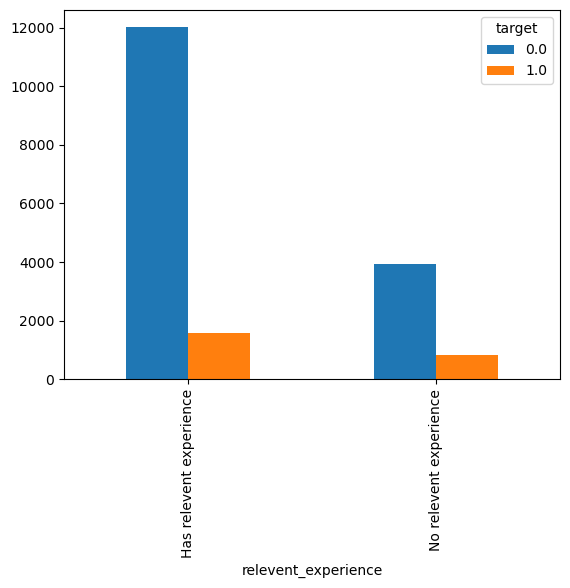

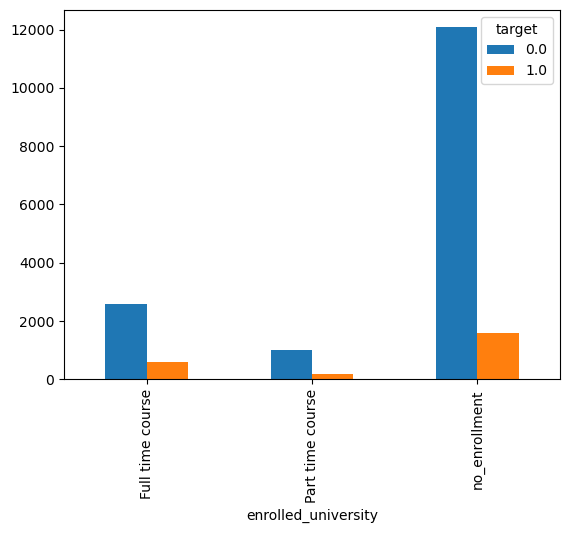

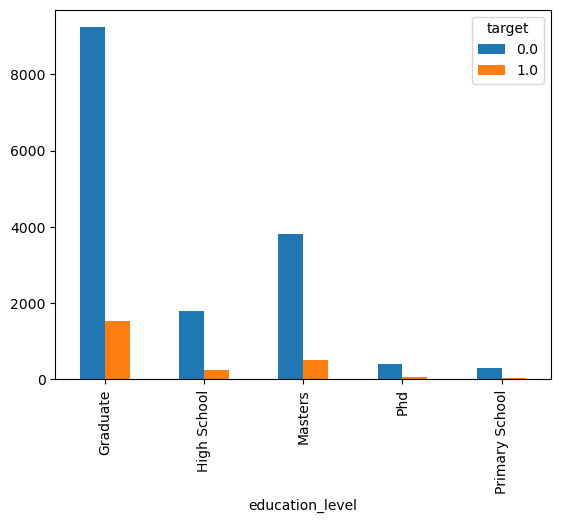

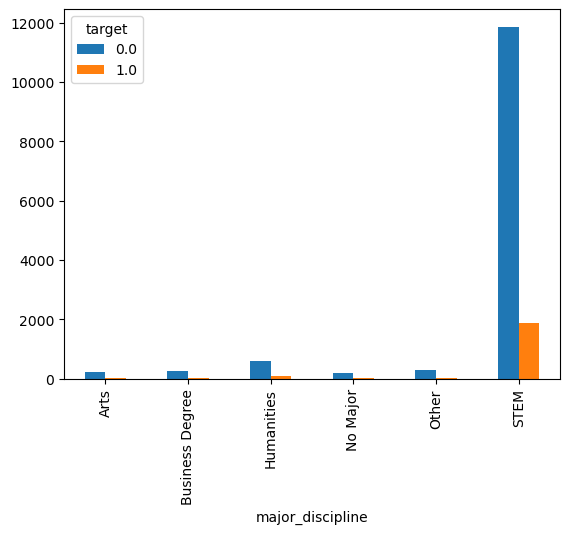

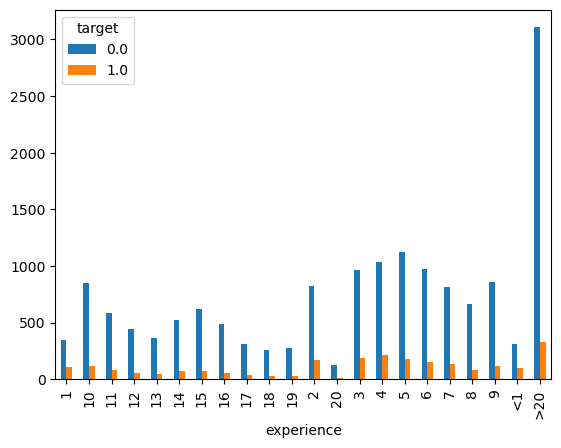

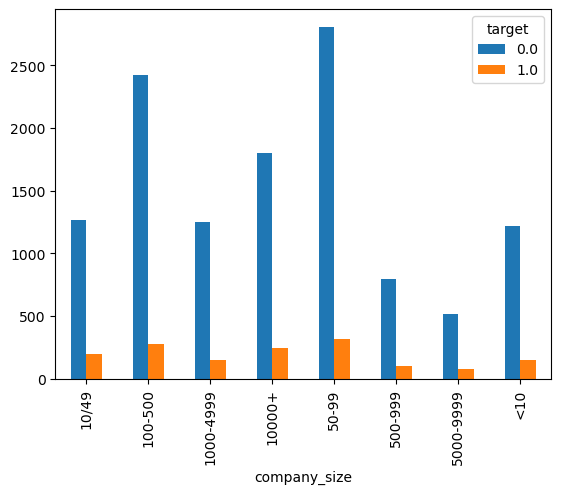

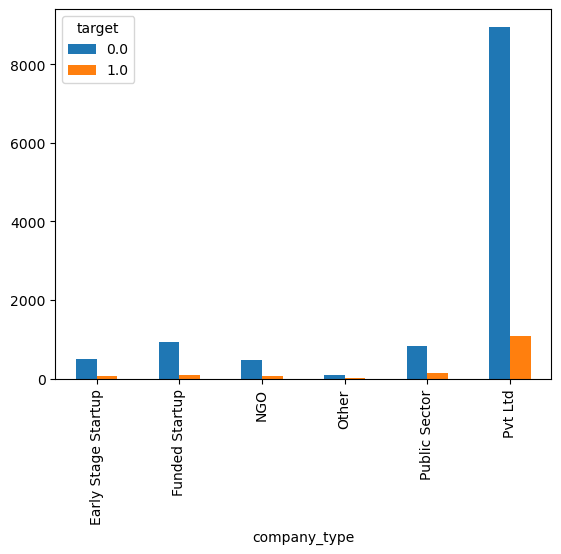

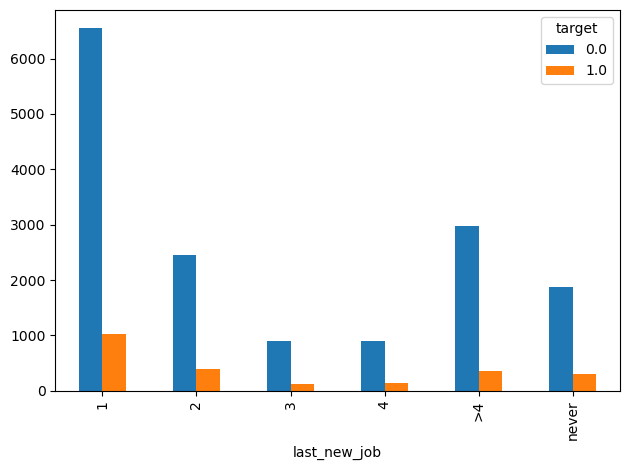

In [14]:
# Cat vs Target 
plt.figure(figsize=(10,10))
for i in cat_col:
    pd.crosstab(combined.loc[:,i],combined.target).plot(kind="bar")
plt.tight_layout()
plt.show()

In [15]:
# City 
combined.city.nunique()

123

In [16]:
mapped =combined.city.value_counts(normalize=True).to_dict()

In [17]:
combined["city"]= combined.city.map(mapped)

In [18]:
combined.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,0.005812,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0
1,29166,0.007280,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0
2,46,0.087717,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0
3,18527,0.007010,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0
4,21751,0.015189,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0


In [19]:
# Enrolee ID 
combined.enrollee_id.describe()
# no repeated value 

count    33380.000000
mean     16690.500000
std       9636.120329
min          1.000000
25%       8345.750000
50%      16690.500000
75%      25035.250000
max      33380.000000
Name: enrollee_id, dtype: float64

In [20]:
def bins(x):
    if x<=8345:
        return ("<=25")
    elif x<=16690:
        return ("<=50")
    elif x<=25035:
        return("<=75")
    else:
        return("100")

In [21]:
combined["bins"] =combined.enrollee_id.apply(bins)

<Axes: xlabel='bins'>

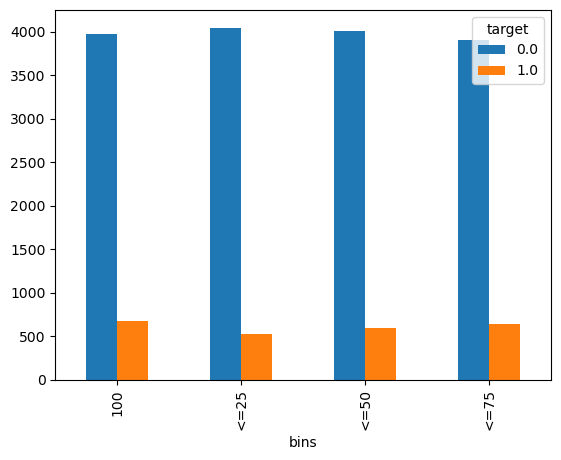

In [22]:
pd.crosstab(combined.bins,combined.target).plot(kind="bar")

In [23]:
import scipy.stats as stats

In [24]:
# Ho : that the bins from enrollee_id and target are independent 
# Ha : that the bins from enrolle_id and target are dependent 
tbl = pd.crosstab(combined.bins,combined.target)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

# Bins and target are related

3.652241533093018e-05


In [32]:
# relevant experience 
combined.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [36]:
# Replacing with 1 and 0s
combined.relevent_experience.replace(to_replace=['Has relevent experience', 'No relevent experience'],value=[1,0], inplace = True)


In [37]:
# ENrolled univ
combined.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [26]:
combined.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
bins                          0
dtype: int64

In [27]:
combined.loc[combined.gender=='Female'].head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,bins
5,13342,0.090533,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,34,0.0,<=50
36,13970,0.015428,0.754,Female,Has relevent experience,no_enrollment,Graduate,STEM,9,1000-4999,NGO,>4,109,0.0,<=50
48,23890,0.235231,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,2,112,0.0,<=75
54,11053,0.235231,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,4,<10,Early Stage Startup,1,18,0.0,<=50
60,11777,0.087717,0.910,Female,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,never,34,1.0,<=50


In [29]:
# Gender~

without_miss= combined.dropna()
tbl = pd.crosstab(combined.enrolled_university,combined.gender)
teststats,pvalue,df,exp_freq = stats.chi2_contingency(tbl)
print(pvalue)


0.0003556916976557466


In [30]:
# ANova


import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("training_hours~gender", data =without_miss).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
gender,2.0,5.653183e+03,2826.591731,0.773628,0.461366
Residual,9284.0,3.392080e+07,3653.683558,NaN,NaN
